# Workgroup 4 

- Andrea Ulloa
- Angela Coapaza
- Ana Ángulo

## Orthogonal Learning

In [13]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

### Simulation Design 1 B=50


In [14]:
# Set seed
np.random.seed(0)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [15]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p ) 

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0] 

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

Text(0.5, 0, 'Naive - True')

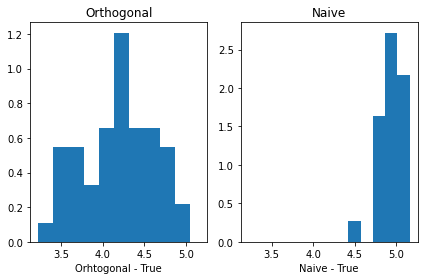

In [16]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1, density = True, bins= 10)
axs[1].hist( Naive - 1, density = True, bins= 5)

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

### Simulation Design 2

In [20]:
# Set seed
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    Y = D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selectin method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True )

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()

    SX_IDs = np.where( coef_array != 0 )[0]

    if sum(SX_IDs) == 0 : 
        Naive[ 0 ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ]

    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]


    resY = hdmpy.rlasso( X , Y , post = True ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = True ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [21]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

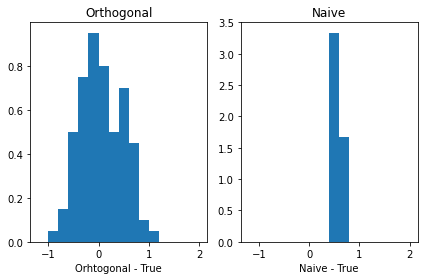

In [22]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 1, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

### Simulation Design 3

In [17]:
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    Y = D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selectin method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True )

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()

    SX_IDs = np.where( coef_array != 0 )[0]

    if sum(SX_IDs) == 0 : 
        Naive[ 0 ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ]

    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]


    resY = hdmpy.rlasso( X , Y , post = True ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = True ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [18]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

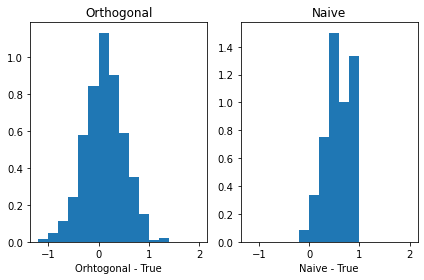

In [19]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 1, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

### Explaining the distribution of the histograms 

From the outset, Orthogonal histograms resemble a normal distribution. The first one does not seem to be centered on the zero mean, and to have a variance of 1. However, as the values increase (B=50 to B=1000), the orthogonal distribution looks like a standard normal. With respect to the Naive histograms, they look like positive skewed distributions, because they are tailed to the left. In the last histogram it can be seen that the values above all are concentrated in the value 1.

## Double Lasso - Testing the Convergence Hypothesis

### 1. What is the Double Lasso Approach?

The Double Lasso approach is useful when we have many covariates to regress a model, so the coefficient of p/n (p:covariates, n:number of observations) is quite close to one. Regressing a model by OLS with these characteristics is not convenient because it generates biases by adding bad controls. For that reason, the Double Lasso approach has to be used to collect the best controls and then estimate a simple OLS to collect the treatment effect on the variable of interest.

### 2. Replication 

In [9]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
growth_read = pyreadr.read_r("../../data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
growth.shape #90 countries and 63 controls

#### OLS

In [7]:
# We create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', axis = 1)

In [12]:
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3.607
Date:                Wed, 04 May 2022   Prob (F-statistic):           0.000200
Time:                        22:50:29   Log-Likelihood:                 238.24
No. Observations:                  90   AIC:                            -352.5
Df Residuals:                      28   BIC:                            -197.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2472      0.785      0.315      0.7

In [16]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

In [39]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci  

table_1 = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_1.index = [ "OLS" ]
table_1

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.0706,0.051844


Este estimador no es significativo, por tanto el estimador de OLS de la variable de interés no puede explicar a la variable dependiente.

#### Double LASSO using cross Validation

In [25]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], axis =  1 )
D = growth['gdpsh465']

In [43]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y - lasso_model.fit( W, Y ).predict( W )
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D - lasso_model.fit( W, D ).predict( W )
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']


C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.829e-03, tolerance: 2.343e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.997e+00, tolerance: 7.148e-03
  model = cd_fast.enet_coordinate_descent(


In [40]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso  
table_2[0,1] = std_lasso   
table_2[0,2] = lower_ci_lasso
table_2[0,3] = upper_ci_lasso    


table_2 = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2.index = [ "LASSO" ]
table_2

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO,-0.047747,0.017705,-0.082926,-0.012567


#### Double Lasso using theoretical Lambda HDMPY

In [45]:
res_Y = hdmpy.rlasso( W, Y).est['residuals']   # By default Post lasso 
res_D = hdmpy.rlasso( W, D ).est['residuals'] # By default Post lasso 

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [46]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

#.get_robustcov_results(cov_type = "HC1")

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Wed, 04 May 2022   Prob (F-statistic):                    0.000533
Time:                        23:40:44   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [58]:
table_3 = np.zeros( (1, 4) )

table_3[0,0] = est_lasso   
table_3[0,1] = std_lasso    
table_3[0,2] = lower_ci_lasso 
table_3[0,3] = upper_ci_lasso     


table_3 = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_3.index = [ "LASSO HDM" ]
table_3

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276


#### Double Lasso using HDMPY DIRECT

In [50]:
# Datadframe 

Y = growth[['Outcome']]
D = growth[['gdpsh465']]

In [51]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")  # put as argument method="partialling out"
lasso_direct

{'alpha': -0.049811444837338376,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.049811444837338376,
 'coefficient': -0.049811444837338376,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
  

In [54]:
lasso_direct['coefficients']

-0.049811444837338376

In [55]:
est_lasso_hdm = lasso_direct['alpha']
std_lasso_hdm = lasso_direct["se"]
lower_ci_lasso_hdm = est_lasso - 1.96*std_lasso
upper_ci_lasso_hdm = est_lasso + 1.96*std_lasso

In [59]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_hdm   
table_4[0,1] = std_lasso_hdm    
table_4[0,2] = lower_ci_lasso_hdm 
table_4[0,3] = upper_ci_lasso_hdm     


table_4 = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4.index = [ "LASSO_direct" ]
table_4

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_direct,-0.049811,0.015391,-0.076973,-0.02265


In [87]:
sumary_table = table_1.append(table_2)
sumary_table = sumary_table.append(table_3)
sumary_table = sumary_table.append(table_4)
sumary_table

C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\1567066412.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumary_table = table_1.append(table_2)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\1567066412.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumary_table = sumary_table.append(table_3)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\1567066412.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumary_table = sumary_table.append(table_4)


,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO,-0.047747,0.017705,-0.082926,-0.012567
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650


#### Coefplot

In [102]:
sumary_table['err_series']=sumary_table['Estimator']-sumary_table['lower bound CI']
sumary_table['varname']=sumary_table.index
sumary_table

,Estimator,Std. Error,lower bound CI,upper bound CI,err_series
OLS,-0.009378,0.029888,-0.070600,0.051844,0.061222
LASSO,-0.047747,0.017705,-0.082926,-0.012567,0.035180
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276,0.027535
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650,0.027161


C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\3535168775.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(sumary_table.shape[0]),


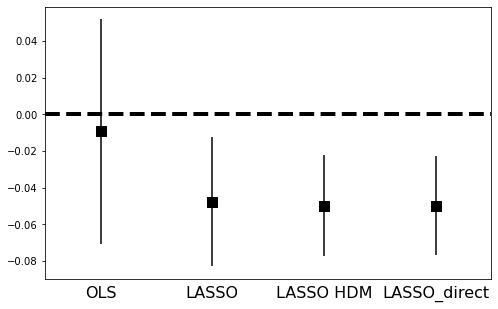

In [109]:
fig, ax = plt.subplots(figsize=(8, 5))
sumary_table.plot(x='varname', y='Estimator', kind='bar', 
             ax=ax, color='none', 
             yerr='err_series', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(sumary_table.shape[0]), 
           marker='s', s=120, 
           y=sumary_table['Estimator'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['OLS','LASSO', 'LASSO HDM','LASSO_direct'], 
                       rotation=0, fontsize=16)


## Neyman Orthogonality Proof

Probando la condicion de orgonalidad de Neyman

Sea la siguiente regresión. Me interesa obtener el efecto de D sobre Y, y hay una alta cantidad de covariables en que están dentro de la matriz W. Realizo regresión doble lasso para obtener $\alpha$.

\begin{align} 
{Y}= \alpha D +  \beta_2 W + {e}   
\end{align}

Los pasos son: 

1. Hallar los estimadores de las regresiones lasso de Y con W y D con W. ($ \hat{\delta}_{YW}$, $\hat{\delta}_{DW}$)

2. Obtener los residuos 
 
- $\tilde{Y} = Y - \hat{\delta}_{YW} W$
- $\tilde{D} = D - \hat{\delta}_{DW} W$

3. Regresionar un OLS con los residuos del paso 2. Así se obtiene rápidamente la estimación del efecto de D sobre Y: $\alpha$

Sea $\eta$ el siguiente vector: 

$\eta^o$ = ($ \hat{\delta}_{YW}$, $\hat{\delta}_{DW}$)

Dado que $\alpha$ es una forma funcional de los estimadores ($\hat{\delta}_{YW}$, $\hat{\delta}_{DW}$), es una función de $\eta$ 

\begin{align} 
 \alpha(\eta^o)
\end{align}

El partialling out funciona porque por la ortogonalidad de Neyman, $\alpha$ es insensible a perturbaciones locales de los parametros al rededor de los verdaderos parametros

\begin{align} 
 D = \frac{d}{d \eta^o}\alpha(\eta^o)= 0
\end{align}

### Demostración matemática

\begin{align}
\alpha = argmin E(\tilde{Y} - a \tilde{D})^2
\end{align}

Notar que $a = \alpha$ resuelve la ecuación
\begin{align}
 E[(\hat{Y} - a \tilde{D}) \tilde{D}] = 0 
\end{align}

Definamos $\eta^o = (\hat{\delta}_{YW}, \hat{\delta}_{DW}) = (\eta_1,\eta_2)$

Sea $M(a,\eta^o) = E[(\tilde{Y}(\eta_1) - a\tilde{D}(\eta_2))\tilde{D}(\eta_2)] = 0$ (D es ortogonal a los residuos)

#### Por el teorema de la función implicita 

En el óptimo $\alpha = a $

$ M(\alpha,\eta^o) = 0 $

\begin{align}
 \frac{d \alpha}{d \eta^o} = - (\frac{d M}{d \alpha})^{-1}  (\frac{d M}{d \eta^o}) = 0
\end{align}

Como el primer término de la expresión anterior no puede ser cero, tenemos que probar que $(\frac{d M}{d \eta^o}) = 0$

\begin{align}
  \frac{d M}{d \eta^o} = \frac{d M}{d \eta_1} + \frac{d M}{d \eta_2}
\end{align}

Cada uno de los terminos que se están sumando en la ecuación anterior deben ser cero.

Primero recordar que:

- 
\begin{align}
  \tilde{Y}(\eta_1) = Y -  W\eta_1
\end{align}

\begin{align}
  \frac{d \tilde{Y}(\eta_1)}{d\eta_1} = -W
\end{align}

- 
\begin{align}
  \tilde{D}(\eta_2)= D - W\eta_2
\end{align}

\begin{align}
  \frac{d \tilde{D}(\eta_2}{d\eta_2} = -W
\end{align}

Entonces:

1. 
\begin{align}
  \frac{d M}{d \eta_1} = E[(\frac{d \tilde{Y}(\eta_1)}{d\eta_1})\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_1} = E[-W(D-W\eta_2]
\end{align}

\begin{align}
  \frac{d M}{d \eta_1} = -E[WD-WW(W'W)^{-1}WD]
\end{align}

\begin{align}
  \frac{d M}{d \eta_1}= -E[0] = 0
\end{align}


2. 
\begin{align}
  \frac{d M}{d \eta_2} = E[-a (\frac{d \tilde{D}(\eta_2)}{d\eta_2})\tilde{D} + (\frac{d \tilde{D}(\eta_2)}{d\eta_2})(\tilde{Y} - a\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[-a W \tilde{D} + W(\tilde{Y}- a\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[W\tilde{Y} - 2 \alpha W\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[W\tilde{Y}] + 2 \alpha E[W\tilde{D}]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[WY - WW(W'W)^{-1}WY] + 2 \alpha E[WD - WW(W'W)^{-1}WD]
\end{align}

\begin{align}
  \frac{d M}{d \eta_2} = -E[0] + 2 \alpha E[0] = 0
\end{align}

Por lo tanto, 

\begin{align}
 \frac{d M}{d \eta^o} = 0
\end{align}

Entonces, hemos demostrado que 

$\frac{d \alpha}{d \eta^o} = - (\frac{d M}{d \alpha})^{-1}  (\frac{d M}{d \eta^o}) = 0$

## GOOD AND BAD CONTROLS

In [3]:
# Import relevant packages for splitting data
import numpy as np
import random
import math
import pandas as pd

# Import packages for OLS regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col


In [2]:
#!pip install causalgraphicalmodels

### Model 1

In [4]:
# Set Seed
# to make the results replicable (generating random numbers)
np.random.seed(12345676)     # set MC seed

n = 2000               # sample size
Z = np.random.normal(0, 1, 2000).reshape((2000, 1))  # generate Z
X = 0.5*Z + np.random.normal(0, 1, 2000).reshape((2000, 1))
Y = X + 2*Z + np.random.normal(0, 1, 2000).reshape((2000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [5]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.0922**  0.0204   
               (0.0460)  (0.0223) 
R-squared      0.4892    0.8802   
R-squared Adj. 0.4889    0.8801   
X              1.7804*** 1.0004***
               (0.0407)  (0.0220) 
Z                        2.0072***
                         (0.0249) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [6]:
!pip install causalgraphicalmodels

In [ ]:
from causalgraphicalmodels import CausalGraphicalModel

In [1]:
!pip install graphviz 

In [ ]:
#1
sprinkler = CausalGraphicalModel(nodes=["X","Y","Z"],
                                 edges=[("Z","X"),
                                        ("Z","Y"),
                                        ("X", "Y")])
sprinkler.draw()

### Model 2

In [9]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 3*U + np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 0.5*Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

In [10]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.0013    -0.0342  
               (0.0498)  (0.0378) 
R-squared      0.9563    0.9749   
R-squared Adj. 0.9562    0.9749   
X              3.8357*** 2.9957***
               (0.0260)  (0.0366) 
Z                        0.5992***
                         (0.0220) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#2
sprinkler = CausalGraphicalModel(nodes=["U","X","Y","Z"],
                                 edges=[("U","Z"),
                                        ("U","Y"),
                                        ("Z","X"),
                                        ("X", "Y")])
sprinkler.draw()

### Model 3

In [11]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 3*U + np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 0.5*U + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

In [12]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.0648    -0.0527* 
               (0.1285)  (0.0316) 
R-squared      0.8707    0.9922   
R-squared Adj. 0.8706    0.9922   
X              5.7586*** 3.0135***
               (0.0702)  (0.0280) 
Z                        1.9985***
                         (0.0160) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#3
sprinkler = CausalGraphicalModel(nodes=["U","X","Y","Z"],
                                 edges=[("U","X"),
                                        ("U","Z"),
                                        ("Z","Y"),
                                        ("X", "Y")])
sprinkler.draw()

### Model 4

In [8]:
# Set Seed
# to make the results replicable (generating random numbers)
np.random.seed(12345676)     # set MC seed

n = 2000               # sample size
Z = np.random.normal(0, 1, 2000).reshape((2000, 1))  # generate Z
X = 0.5*Z + np.random.normal(0, 1, 2000).reshape((2000, 1))
M = X + 2*Z + np.random.normal(0, 1, 2000).reshape((2000, 1))
Y = M + np.random.normal(0, 1, 2000).reshape((2000, 1))

# Create dataframe
D = np.hstack((Z, M, X, Y))
data = pd.DataFrame(D, columns = ["Z", "M", "X", "Y"])

In [9]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.1177**  0.0461   
               (0.0509)  (0.0314) 
R-squared      0.4334    0.7850   
R-squared Adj. 0.4331    0.7848   
X              1.7624*** 0.9845***
               (0.0451)  (0.0309) 
Z                        2.0017***
                         (0.0350) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#4
sprinkler = CausalGraphicalModel(nodes=["M","X","Y","Z"],
                                 edges=[("Z","X"),
                                        ("Z","M"),
                                        ("X","M"),
                                        ("M", "Y")])
sprinkler.draw()

### Model 5

In [23]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 3*U + np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 0.5*Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
M = 1.5*X + 2*U + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*M + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, M, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "M", "X", "Y"])

In [24]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + M + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.0386    0.0378   
               (0.1048)  (0.0310) 
M                        2.0305***
                         (0.0260) 
R-squared      0.9519    0.9958   
R-squared Adj. 0.9519    0.9958   
X              7.6728*** 2.9732***
               (0.0546)  (0.0491) 
Z                        -0.0307  
                         (0.0238) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#5
sprinkler = CausalGraphicalModel(nodes=["U","M","X","Y","Z"],
                                 edges=[("U","Z"),
                                        ("U","M"),
                                        ("Z","X"),
                                        ("X","M"),
                                        ("M", "Y")])
sprinkler.draw()

### Model 6

In [26]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 3*U + np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 0.5*U + np.random.normal(0, 1, 1000).reshape((1000, 1))
M = 1.5*X + 2*Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*M + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

In [27]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + M + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I        Y II  
-----------------------------------
Intercept      0.1657     0.0391   
               (0.2587)   (0.0310) 
M                         2.0474***
                          (0.0310) 
R-squared      0.8693     0.9981   
R-squared Adj. 0.8691     0.9981   
X              11.5182*** 2.9415***
               (0.1414)   (0.0544) 
Z                         -0.1037  
                          (0.0640) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#6
sprinkler = CausalGraphicalModel(nodes=["U","M","X","Y","Z"],
                                 edges=[("U","X"),
                                        ("U","Z"),
                                        ("Z","M"),
                                        ("X","M"),
                                        ("M", "Y")])
sprinkler.draw()

### Model 7

In [30]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U_1 = np.random.normal(0, 1, 1000).reshape((1000, 1))
U_2 = np.random.normal(0, 1, 1000).reshape((1000, 1))

Z = 0.5*U_1 + 0.5*U_2 + np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 2*U_1 + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*U_2 + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U_1,U_2, Z, X, Y))
data = pd.DataFrame(D, columns = ["U_1", "U_2", "Z", "X", "Y"])

In [31]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.0387    0.0124   
               (0.0922)  (0.0645) 
R-squared      0.4790    0.7455   
R-squared Adj. 0.4785    0.7450   
X              1.2439*** 0.8690***
               (0.0411)  (0.0310) 
Z                        1.7654***
                         (0.0546) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#7
sprinkler = CausalGraphicalModel(nodes=["U1","U2","X","Y","Z"],
                                 edges=[("U1","X"),
                                        ("U1","Z"),
                                        ("U2","Z"),
                                        ("U2","Y"),
                                        ("X", "Y")])
sprinkler.draw()

### Model 8

In [32]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size

Z = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [34]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.1404**  0.0001   
               (0.0713)  (0.0327) 
R-squared      0.1950    0.8312   
R-squared Adj. 0.1942    0.8309   
X              1.1088*** 1.0192***
               (0.0713)  (0.0327) 
Z                        2.0158***
                         (0.0329) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#8
sprinkler = CausalGraphicalModel(nodes=["X","Y","Z"],
                                 edges=[("X","Y"),
                                        ("Z","Y"), ])
                                       
sprinkler.draw()

### Model 9

In [35]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size

Z = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = 0.5*Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

In [36]:
# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.0005    0.0001   
               (0.0327)  (0.0327) 
R-squared      0.5590    0.5590   
R-squared Adj. 0.5585    0.5581   
X              1.0218*** 1.0192***
               (0.0287)  (0.0327) 
Z                        0.0062   
                         (0.0374) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#9
sprinkler = CausalGraphicalModel(nodes=["X","Y","Z"],
                                 edges=[("Z","X"),
                                        ("X","Y"), ])
                                       
sprinkler.draw()

### Model 10 Bad control

In [38]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = np.random.normal(0, 1, 1000).reshape((1000, 1)) # generate Z
X = 0.5*Z + 2*U + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 1.5*U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((U, Z, X, Y))
data = pd.DataFrame(D, columns = ["U", "Z", "X", "Y"])

# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"      #classical

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II   
-----------------------------------
Intercept      -0.0249   -0.0313   
               (0.0396)  (0.0384)  
R-squared      0.8948    0.9012    
R-squared Adj. 0.8947    0.9010    
X              1.5627*** 1.5984*** 
               (0.0170)  (0.0170)  
Z                        -0.3197***
                         (0.0398)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#10
sprinkler = CausalGraphicalModel(nodes=["U","X","Y","Z"],
                                 edges=[("Z","X"),
                                        ("U","X"),
                                        ("U","Y"),
                                        ("X", "Y")])
sprinkler.draw()

### Model 11

In [11]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = X + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = Z + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

# Regressions
no_control = "Y ~ X"          
using_control = "Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      -0.0080   0.0001   
               (0.0460)  (0.0327) 
R-squared      0.3467    0.6691   
R-squared Adj. 0.3461    0.6684   
X              1.0616*** -0.0034  
               (0.0461)  (0.0474) 
Z                        1.0192***
                         (0.0327) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#11
sprinkler = CausalGraphicalModel(nodes=["X","Y","Z"],
                                 edges=[("X","Z"),
                                        ("Z","Y")])
sprinkler.draw()

### Model 12

In [5]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
M = X + np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 2*M + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = M + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y, M))
data = pd.DataFrame(D, columns = ["Z", "X", "Y", "M"])

# Regressions
no_control = "Y ~ X"          
using_control = " Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      -0.0611   -0.0550  
               (0.0442)  (0.0346) 
R-squared      0.3673    0.6139   
R-squared Adj. 0.3666    0.6131   
X              1.0681*** 0.2587***
               (0.0444)  (0.0472) 
Z                        0.3843***
                         (0.0152) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#12
sprinkler = CausalGraphicalModel(nodes=["M","X","Y","Z"],
                                 edges=[("X","M"),
                                        ("M","Y"),
                                        ("M","Z")])
sprinkler.draw()

### Model 13 Neutral control

In [6]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = np.random.normal(0, 1, 1000).reshape((1000, 1))
M = X + 0.5*Z + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = M + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y, M))
data = pd.DataFrame(D, columns = ["Z", "X", "Y", "M"])

# Regressions
no_control = "Y ~ X"          
using_control = " Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      -0.0572   -0.0532  
               (0.0482)  (0.0456) 
R-squared      0.3259    0.3975   
R-squared Adj. 0.3252    0.3963   
X              1.0624*** 1.0401***
               (0.0484)  (0.0458) 
Z                        0.4961***
                         (0.0455) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#13
sprinkler = CausalGraphicalModel(nodes=["M","X","Y","Z"],
                                 edges=[("X","M"),
                                        ("Z","M"),
                                        ("M","Y")])
sprinkler.draw()

### Model 14 Neutral control

In [7]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 0.5*X + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

# Regressions
no_control = "Y ~ X"          
using_control = " Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      -0.0000   0.0001   
               (0.0327)  (0.0327) 
R-squared      0.4900    0.4901   
R-squared Adj. 0.4895    0.4891   
X              1.0167*** 1.0062***
               (0.0328)  (0.0374) 
Z                        0.0192   
                         (0.0327) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#14
sprinkler = CausalGraphicalModel(nodes=["X","Y","Z"],
                                 edges=[("X","Z"),
                                        ("X","Y"),
                                      ])
sprinkler.draw()

### Model 15 Neutral control

In [8]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 0.5*X + np.random.normal(0, 1, 1000).reshape((1000, 1))
W = 2*Z + 1.5*U + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create dataframe
D = np.hstack((Z, X, Y, W, U))
data = pd.DataFrame(D, columns = ["Z", "X", "Y", "W", "U"])

# Regressions
no_control = "Y ~ X"          
using_control = " Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.1754**  0.1753** 
               (0.0697)  (0.0698) 
R-squared      0.1970    0.1974   
R-squared Adj. 0.1962    0.1958   
X              1.0918*** 1.0670***
               (0.0698)  (0.0782) 
Z                        0.0478   
                         (0.0677) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#15
sprinkler = CausalGraphicalModel(nodes=["U","W","X","Y","Z"],
                                 edges=[("U","Y"),
                                        ("U","W"),
                                        ("X","Y"),
                                        ("X","Z"),
                                        ("Z","W"),
                                        ])
sprinkler.draw()

### Model 16 Bad control

In [9]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size
U = np.random.normal(0, 1, 1000).reshape((1000, 1))
X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 0.5*X + 2*U + np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + 2*U + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create datafram
D = np.hstack((Z, X, Y, U))
data = pd.DataFrame(D, columns = ["Z", "X", "Y", "U"])

# Regressions
no_control = "Y ~ X"          
using_control = " Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      0.0875    -0.0241  
               (0.0710)  (0.0430) 
R-squared      0.1843    0.7030   
R-squared Adj. 0.1835    0.7024   
X              1.0668*** 0.5832***
               (0.0711)  (0.0444) 
Z                        0.7945***
                         (0.0190) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#16
sprinkler = CausalGraphicalModel(nodes=["U","X","Y","Z"],
                                 edges=[("U","Y"),
                                        ("U","z"),
                                        ("X","Y"),
                                        ("X","Z"),
                                      
                                        ])
sprinkler.draw()

### Model 17 Bad control

In [10]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size

X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 0.5*X + 2*Y + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create datafram
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

# Regressions
no_control = "Y ~ X"          
using_control = " Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      -0.0079   -0.0017  
               (0.0317)  (0.0144) 
R-squared      0.5198    0.9004   
R-squared Adj. 0.5193    0.9002   
X              1.0449*** 0.0216   
               (0.0318)  (0.0220) 
Z                        0.3926***
                         (0.0064) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#17
sprinkler = CausalGraphicalModel(nodes=["X","Y","Z"],
                                 edges=[("X","Y"),
                                        ("X","Z"),
                                        ("Z","Y"),
                                      
                                        ])
sprinkler.draw()

### Model 18 Bad control

In [11]:
np.random.seed(12345676)     # set MC seed

n = 1000                # sample size

X = np.random.normal(0, 1, 1000).reshape((1000, 1))
Y = X + np.random.normal(0, 1, 1000).reshape((1000, 1))
Z = 2*Y + np.random.normal(0, 1, 1000).reshape((1000, 1))

# Create datafram
D = np.hstack((Z, X, Y))
data = pd.DataFrame(D, columns = ["Z", "X", "Y"])

# Regressions
no_control = "Y ~ X"          
using_control = " Y ~ X + Z"  

no_control = smf.ols(no_control , data=data).fit()
using_control = smf.ols(using_control , data=data).fit()

# Summary results
dfoutput = summary_col([no_control,using_control],stars=True)
print(dfoutput)


                  Y I       Y II  
----------------------------------
Intercept      -0.0079   -0.0017  
               (0.0317)  (0.0144) 
R-squared      0.5198    0.9004   
R-squared Adj. 0.5193    0.9002   
X              1.0449*** 0.2179***
               (0.0318)  (0.0197) 
Z                        0.3926***
                         (0.0064) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [ ]:
#18
sprinkler = CausalGraphicalModel(nodes=["X","Y","Z"],
                                 edges=[("X","Y"),
                                        ("Y","Z"),])
sprinkler.draw()